# Assignment 4 - Linear regression
Mathematics and Methods in Machine Learning and Neural Networks<br>
Jori Nordlund, Simo Ojala, Esa Ryömä<br>
Helsinki Metropolia University of Applied sciences<br>
07.02.2020


First, choose either red or white wines as the target of the study.

Then choose a trait from two options:
 
1) wine quality or 

2) wine alcohol content, 

whichever you
find more interesting.
Now, your task is to build a regression model that predicts the values of your chosen response
variable as well as possible.


You should provide evidence-based answers to the following questions:
1. What is the regression equation for estimating your chosen trait values?
2. What are the five most useful variables for estimating the trait values?
3. Provide a validation-based error estimate for your model. As the data set is large, use
split validation that divides the data set into separate training and testing sets.

Your deliverable should include both the Python codes and the results needed to verify the
conclusions.

Submit your work preferably in pdf format. The deliverable should contain the information
specified in the points 1 to 3 above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Data

In [0]:
filename = r'https://raw.githubusercontent.com/esaryoma/machine-learning-datasets/master/wine/winequality-red.csv'
df = pd.read_csv(filename,
                index_col = None,
                sep = ';',
                na_values='?')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [0]:
# Save column names for later
colNames = df.columns.array

colNames = colNames[0:11]


scaler = StandardScaler()

# Splitting dataset to data and labels
data = df.loc[:, 'fixed acidity':'alcohol']
labels = df.loc[:, 'quality']


#Standardize data
dfn = scaler.fit_transform(data)
dfn = pd.DataFrame(dfn)
dfn.columns = colNames
print(dfn)

# Splitting data so that different samples are used for training and validating the model
# Training data is approximately 2/3 of all the data and 1/3 is left for the validation
trainingData, validationData, trainingLabels, validationLabels = split(dfn,labels, train_size=0.66, shuffle = False)

      fixed acidity  volatile acidity  ...  sulphates   alcohol
0         -0.528360          0.961877  ...  -0.579207 -0.960246
1         -0.298547          1.967442  ...   0.128950 -0.584777
2         -0.298547          1.297065  ...  -0.048089 -0.584777
3          1.654856         -1.384443  ...  -0.461180 -0.584777
4         -0.528360          0.961877  ...  -0.579207 -0.960246
...             ...               ...  ...        ...       ...
1594      -1.217796          0.403229  ...  -0.461180  0.072294
1595      -1.390155          0.123905  ...   0.601055  0.729364
1596      -1.160343         -0.099554  ...   0.542042  0.541630
1597      -1.390155          0.654620  ...   0.305990 -0.209308
1598      -1.332702         -1.216849  ...   0.010924  0.541630

[1599 rows x 11 columns]


## Linear regression model
Creating the linear regressiong model and fitting the data.

In [0]:
reg = lm.LinearRegression()
reg.fit(trainingData, trainingLabels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Coefficients
Printing the coefficients and deducting which variables have the most impact on the quality of the wine.

In [0]:
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)
pasld= pd.DataFrame(reg.coef_.reshape(-1,11))
pasld.columns = colNames
pasld
# Regression equation
# Most important variables

Coefficients: [ 0.06937073 -0.17963069 -0.05168847  0.04891476 -0.07038944  0.0292211
 -0.14399338 -0.06135089 -0.03168817  0.12487191  0.29585615]
Intercept: 5.664236139287756


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.069371,-0.179631,-0.051688,0.048915,-0.070389,0.029221,-0.143993,-0.061351,-0.031688,0.124872,0.295856


## Top 5 Variables:
- Alcohol (0.296)
- Volatile acidity (-0.180)
- Total sulfur dioxide (-0.144)
- Sulphates (0.125)
- Fixed acidity (0.07)


## Regression equation
With our linear regression we got the following regression equation:<br><br>
quality = <br>
fixed acidity * 0.069371 + volatile acidity * -0.179631 + citric acid * -0.051688 + residual sugar * 0.048915 + chlorides * -0.070389 + <br> 
free sulfur dioxide * 0.029221 + total sulfur dioxide * - 0.143993 + density * -0.061351 + pH * -0.031688 + sulphates * 0.124872 + <br>
alcohol * 0.295856 + Intercept, <br>
where Intercept = 5.664236

## Validation
Testing the models performance with validation data and calculating mean squared error (MSE) and R^2 (R2s) values.

In [0]:
# compute predicted values
Y_pred = reg.predict(validationData)

# compute error statistics
mse = mean_squared_error(validationLabels, Y_pred)
r2s = r2_score(validationLabels, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

MSE =  0.4488574299203903
R2s =  0.32004610874034756


Comparison of the actual values vs the predicted values with the calculated residual.

In [0]:
df2 = pd.DataFrame({'Actual': validationLabels, 'Predicted': Y_pred, 'Residual': pd.Series(validationLabels-Y_pred)})
print(df2)

      Actual  Predicted  Residual
1055       6   4.971250  1.028750
1056       7   6.285870  0.714130
1057       5   5.180255 -0.180255
1058       7   6.063124  0.936876
1059       7   6.285870  0.714130
...      ...        ...       ...
1594       5   5.586723 -0.586723
1595       6   5.962889  0.037111
1596       6   5.951216  0.048784
1597       5   5.510745 -0.510745
1598       6   6.016766 -0.016766

[544 rows x 3 columns]


## Observed and predicted values

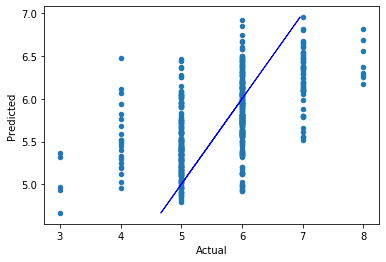

<Figure size 1080x720 with 0 Axes>

In [0]:

df2.plot.scatter(x='Actual',y='Predicted')
plt.plot(Y_pred, Y_pred, '-b', linewidth = 1)
plt.figure(figsize=(15,10))
plt.show()



## Actual values and residual

<Figure size 1080x720 with 0 Axes>

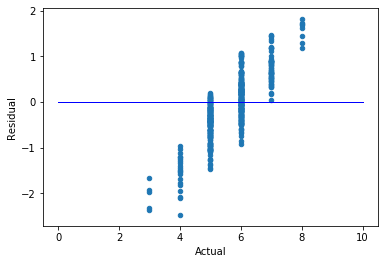

In [0]:
plt.figure(figsize=(15,10))
df2.plot.scatter(x='Actual',y='Residual')
plt.plot([0,10],[0,0],'-b',linewidth=1)
plt.show()

In [0]:
print(df2.Residual)
print("\n\nMEAN OF RESIDUALS:",np.mean(abs(df2.Residual))) # Mean of residuals helps to understand how much on average the predicted values differ from the actual values 

1055    1.028750
1056    0.714130
1057   -0.180255
1058    0.936876
1059    0.714130
          ...   
1594   -0.586723
1595    0.037111
1596    0.048784
1597   -0.510745
1598   -0.016766
Name: Residual, Length: 544, dtype: float64


MEAN OF RESIDUALS: 0.5088142425786994
